In [1]:
%pylab inline 
import face_recognition
import cv2
import matplotlib.patches as patches
from IPython.display import clear_output
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
import pandas as pd
from datetime import datetime
import time

from skimage.measure import compare_ssim
import pyscreenshot as ImageGrab
import imutils

Populating the interactive namespace from numpy and matplotlib


In [21]:
def img_resize(image, width=None, height=None, inter=cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation=inter)

    # return the resized image
    return resized

In [22]:
def img_diff(imageA, imageB):
#     max_w, max_h = None, None
#     if imageA.shape[:2] != imageB.shape[:2]:
#         max_w = max(imageA.shape[0], imageB.shape[0])
#         max_h = max(imageA.shape[1], imageB.shape[1])
    
#     # convert the images to grayscale
#     if max_w or max_h:
#         grayA = cv2.cvtColor(
#             imutils.resize(imageA, width=max_w, height=max_h), cv2.COLOR_BGR2GRAY)
#         grayB = cv2.cvtColor(
#             imutils.resize(imageB, width=max_w, height=max_h), cv2.COLOR_BGR2GRAY)
#         if grayA.shape != grayB.shape:
#             gray_max_w = max(grayA.shape[0], grayB.shape[0])
#             gray_max_h = max(grayA.shape[1], grayB.shape[1])
#             right_a, bottom_a = gray_max_h-grayA.shape[1],  gray_max_w-grayA.shape[0]
#             right_b, bottom_b = gray_max_h-grayB.shape[1],  gray_max_w-grayB.shape[0]
#             if (bottom_a, right_a) != (0, 0):
#                 grayA = cv2.copyMakeBorder(
#                     grayA, 0, bottom_a, 0, right_a,
#                     cv2.BORDER_CONSTANT, value=(0, 0, 0))
#             if (bottom_b, right_b) != (0, 0):
#                 o_grayB = grayB.copy()
#                 grayB = cv2.copyMakeBorder(
#                     grayB, 0, bottom_b, 0, right_b,
#                     cv2.BORDER_CONSTANT, value=(0, 0, 0))
#     else:
    grayA = cv2.cvtColor(np.float32(imageA), cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(np.float32(imageB), cv2.COLOR_BGR2GRAY)
        
    (score, diff) = compare_ssim(grayA, grayB, full=True)
    print("SSIM: {}".format(score))
    return score

Tuesday, February 18, 2020 11:16:47


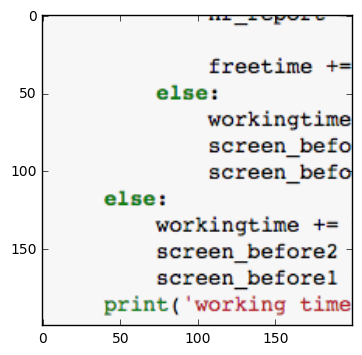

Tuesday, February 18, 2020 11:16:51


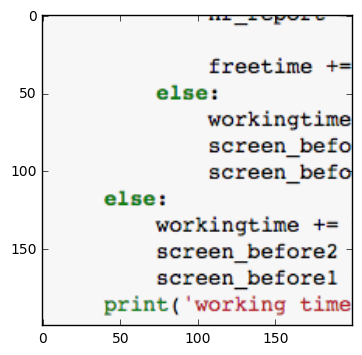

Tuesday, February 18, 2020 11:16:55


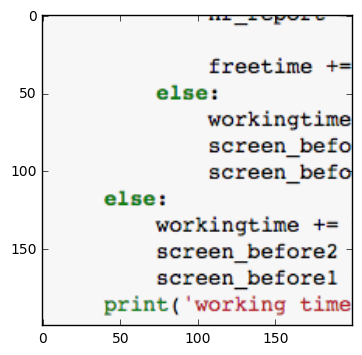

SSIM: 1.0
SSIM: 1.0
working time: 0s - free time: 3.812633991241455s
Tuesday, February 18, 2020 11:16:59


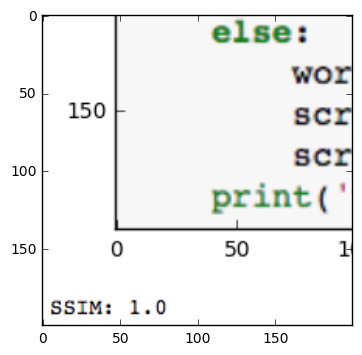

SSIM: 0.45326626910905066
working time: 4.197155952453613s - free time: 3.812633991241455s
Tuesday, February 18, 2020 11:17:03


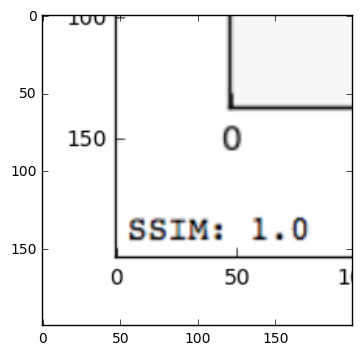

SSIM: 0.6155145739998281
working time: 7.850874900817871s - free time: 3.812633991241455s
Tuesday, February 18, 2020 11:17:06


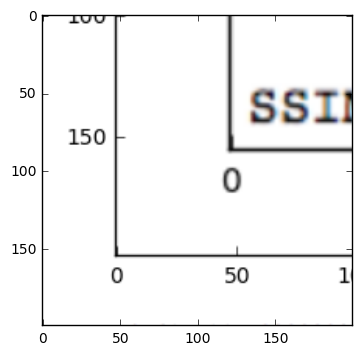

SSIM: 0.7708827358698332
working time: 11.658865928649902s - free time: 3.812633991241455s


In [23]:
workingtime = 0
freetime = 0
hr_report = pd.DataFrame(columns = ['Time', 'Note', 'Image_Before', 'Image_After'])
timestep = 3

screen_before2 = ImageGrab.grab(bbox=(500, 500, 700, 700))  # X1,Y1,X2,Y2
print(datetime.fromtimestamp(time.time()).strftime("%A, %B %d, %Y %I:%M:%S"))
plt.imshow(screen_before2)
plt.show()
time.sleep(timestep)

screen_before1 = ImageGrab.grab(bbox=(500, 500, 700, 700))
print(datetime.fromtimestamp(time.time()).strftime("%A, %B %d, %Y %I:%M:%S"))
plt.imshow(screen_before1)
plt.show()
time.sleep(timestep)

t_start = time.time()

while True:
    # Stop
    if (time.time() - 12) > t_start:
        break
    t = time.time()    
    # Taking screen shot
    screen = ImageGrab.grab(bbox=(500, 500, 700, 700))
#     screen = cv2.cvtColor(screen, cv2.COLOR_BGR2RGB)
    time_check = datetime.fromtimestamp(time.time()).strftime("%A, %B %d, %Y %I:%M:%S")
    print(time_check)
    plt.imshow(screen)
    plt.show()
        
    if img_diff(screen_before1, screen) > 0.8:
        if img_diff(screen_before2, screen) > 0.8:
            df_temp = pd.DataFrame(columns = ['Time', 'Note', 'Image_Before', 'Image_After'])
            df_temp['Time'] = [time_check]
            df_temp['Note'] = ['Screen no change']
            df_temp['Image_Before'] = [screen_before2]
            df_temp['Image_After'] = [screen]
            hr_report = pd.concat([hr_report, df_temp])

            freetime += timestep + time.time() - t
        else:
            workingtime += timestep + time.time() - t
            screen_before2 = screen_before1
            screen_before1 = screen
    else:
        workingtime += timestep + time.time() - t
        screen_before2 = screen_before1
        screen_before1 = screen
    print('working time: %ss - free time: %ss' % (workingtime, freetime))
    
    time.sleep(timestep)

In [24]:
hr_report = hr_report.reset_index(drop=True)
hr_report

,Time,Note,Image_Before,Image_After
0,"Tuesday, February 18, 2020 11:16:55",Screen no change,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.PngImagePlugin.PngImageFile image mode=RG...
